In [28]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df= pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['label','msg'])

In [31]:
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
df.shape

(5572, 2)

In [38]:
df.size

16716

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   msg     5572 non-null   object
 2   len     5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [40]:
df['len']= df['msg'].apply(len)

In [41]:
df

,label,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Axes: >

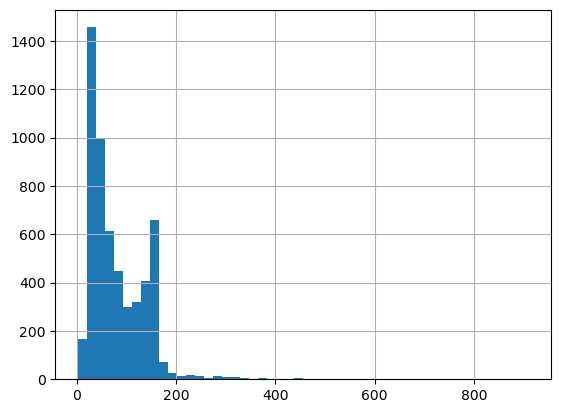

In [42]:
df['len'].hist(bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

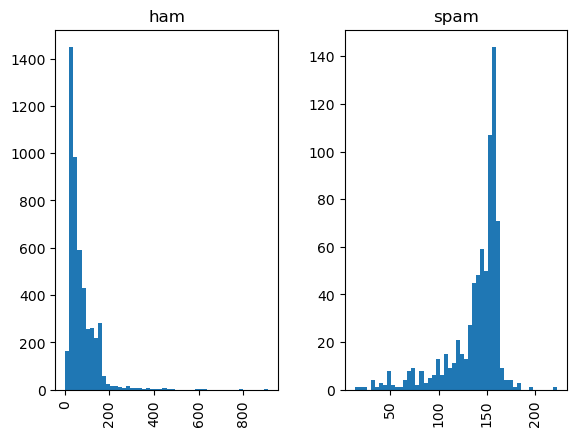

In [43]:
df.hist(bins=50, by='label',column='len')

In [44]:
df['len'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [65]:
df[df['len']==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [14]:
## Data Cleaning
## 1. Remove Punctuations
# 2. Remove Stopwords

In [50]:
import string

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
var= 'this is ^%%^%&&***data science class and going better *&*&*&*&?><'

In [53]:
no_punc= [x for x in var if x not in string.punctuation]
no_punc= ''.join(no_punc)

In [54]:
print(no_punc)

this is data science class and going better 


In [55]:
from nltk.corpus import stopwords

In [56]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
def cleanwords(title):
    no_punc= [ x for x in title if x not in string.punctuation]
    no_punc= ''.join(no_punc)
    return [x for x in no_punc.split() if x.lower() not in stopwords.words('english')]

In [59]:
no_punc

'this is data science class and going better '

In [60]:
no_punc.split()

['this', 'is', 'data', 'science', 'class', 'and', 'going', 'better']

In [61]:
cleanwords('My first course in the machine&&T^&&^ learning in excelr((*()))')

['first', 'course', 'machineT', 'learning', 'excelr']

In [62]:
a='My'

In [63]:
a.lower()

'my'

In [64]:
## lemitizer and stemmer

In [68]:
from nltk.tokenize import word_tokenize

In [69]:
sentence= 'This is a Machine Learning Session and going better from the past two months'

In [70]:
words= word_tokenize(sentence)

In [72]:
print(words)

['This', 'is', 'a', 'Machine', 'Learning', 'Session', 'and', 'going', 'better', 'from', 'the', 'past', 'two', 'months']


In [73]:
## stemming

In [74]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [75]:
stem= PorterStemmer()

In [80]:
stem.stem('being')

'be'

In [81]:
lem= WordNetLemmatizer()

In [94]:
lem.lemmatize('mixing',pos='v')

'mix'

In [95]:
print(words)

['This', 'is', 'a', 'Machine', 'Learning', 'Session', 'and', 'going', 'better', 'from', 'the', 'past', 'two', 'months']


In [102]:
for i in words:
    print('{0:20} {1:20} {2:20}'.format(i, stem.stem(i),lem.lemmatize(i,pos='a')))

This                 thi                  This                
is                   is                   is                  
a                    a                    a                   
Machine              machin               Machine             
Learning             learn                Learning            
Session              session              Session             
and                  and                  and                 
going                go                   going               
better               better               good                
from                 from                 from                
the                  the                  the                 
past                 past                 past                
two                  two                  two                 
months               month                months              


In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [127]:
ct= CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)

In [128]:
corpus=['this is the data science class with SL',
       'AI is the next class',
       'and this is third class',
       'and this is fourth class']

In [129]:
x= ct.fit_transform(corpus)

In [130]:
print(ct.get_feature_names_out())

['AI' 'SL' 'class' 'data' 'fourth' 'next' 'science' 'third']


In [131]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [121]:
x.shape

(4, 13)

In [122]:
a=TfidfTransformer()

In [123]:
b=a.fit_transform(x)

In [126]:
b.toarray()

array([[0.        , 0.        , 0.22103912, 0.42357521, 0.        ,
        0.22103912, 0.        , 0.42357521, 0.42357521, 0.33395156,
        0.        , 0.27036257, 0.42357521],
       [0.56199026, 0.        , 0.29326983, 0.        , 0.        ,
        0.29326983, 0.56199026, 0.        , 0.        , 0.44307958,
        0.        , 0.        , 0.        ],
       [0.        , 0.49144966, 0.32528549, 0.        , 0.        ,
        0.32528549, 0.        , 0.        , 0.        , 0.        ,
        0.62334157, 0.39787085, 0.        ],
       [0.        , 0.49144966, 0.32528549, 0.        , 0.62334157,
        0.32528549, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39787085, 0.        ]])

In [132]:
ct= CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)

In [133]:
x= ct.fit_transform(df['msg'])

In [134]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [135]:
x

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [137]:
x.shape

(5572, 11425)

In [138]:
x.size

50548

In [139]:
5572*11425

63660100

In [140]:
50548/63660100

0.0007940295412668218

In [141]:
a= TfidfTransformer()

In [142]:
b= a.fit_transform(x)

In [143]:
b.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
b

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [149]:
rand= RandomForestClassifier()

In [150]:
rand.fit(b,df['label'])

RandomForestClassifier()

In [154]:
y_pred= rand.predict(b)
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [152]:
accuracy_score(df['label'],y_pred)

1.0

In [155]:
print(classification_report(df['label'],y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       1.00      1.00      1.00       747

    accuracy                           1.00      5572
   macro avg       1.00      1.00      1.00      5572
weighted avg       1.00      1.00      1.00      5572



In [157]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test= train_test_split(df['msg'],df['label'],train_size=0.75,random_state=100)

In [160]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4179,)
(4179,)
(1393,)
(1393,)


In [163]:
pipeline= Pipeline([('CountVect',CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)),('Tfidf',TfidfTransformer()),('rand',RandomForestClassifier(n_estimators=100))])

In [164]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('CountVect',
                 CountVectorizer(analyzer=<function cleanwords at 0x000002B4A589C360>)),
                ('Tfidf', TfidfTransformer()),
                ('rand', RandomForestClassifier())])

In [165]:
y_pred1= pipeline.predict(x_test)

In [166]:
accuracy_score(y_test,y_pred1)

0.9712849964106246

In [168]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       1.00      0.79      0.88       187

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

